<a href="https://colab.research.google.com/github/IA-UNISON/IA-UNISON.github.io/blob/main/assets/libretas/intro-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a `pandas`

**Curso Inteligencia Artificial 2026-1**

Julio Waissman

In [1]:
import pandas as pd

## Creando un dataframe

Pandas es un marco de desarrollo para la manipulación de datos, creado originalmente para ofrecer en python las facilidades de manejo de tablas de datos que tiene en forma nativa el lenguaje `R`.

Pandas se basa en dos clases: `Serie` y `DataFrame`, ambas heredadas de la clase `ndarray`de numpy. Un objeto de la clase `Serie`(que llamaremos serie) es un arreglo de datos de un solo tipo, los cuales se encuentran indexados. Un objeto tipo `DataFrame`es una colección de series, en la que se comparte el índice (o renglón), pero cada serie (o columna) tiene su propio tipo. En la figura se muestra como es un DataFrame

![](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

Vamos a crear un `Dataframe`:

In [2]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"]
    }
)

Y vamos a ver los primeros 2 elementos y los últimos 3

In [3]:
display(df.head(2))

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male


In [4]:
display(df.tail(2))

,Name,Age,Sex
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


Ahora vamos a investigar la información de la tabla y cada una de las series que la componen:

In [5]:
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Allen, Mr. William Henry"
2,"Bonnell, Miss. Elizabeth"


In [6]:
df['Age']

,Age
0,22
1,35
2,58


In [7]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [8]:
df.index = ['tata', 'tete', 'toto']
df

,Name,Age,Sex
tata,"Braund, Mr. Owen Harris",22,male
tete,"Allen, Mr. William Henry",35,male
toto,"Bonnell, Miss. Elizabeth",58,female


In [9]:
df.dtypes

,0
Name,object
Age,int64
Sex,object


In [10]:
df.describe(include='all')

,Name,Age,Sex
count,3,3.000000,3
unique,3,NaN,2
top,"Braund, Mr. Owen Harris",NaN,male
freq,1,NaN,2
mean,NaN,38.333333,NaN
std,NaN,18.230012,NaN
min,NaN,22.000000,NaN
25%,NaN,28.500000,NaN
50%,NaN,35.000000,NaN
75%,NaN,46.500000,NaN


In [11]:
df.describe(include=object)

,Name,Sex
count,3,3
unique,3,2
top,"Braund, Mr. Owen Harris",male
freq,1,2


## Leyendo un dataframe

En pandas, es posible leer y escribir los dataframes en diferentes formatos. Para esto en pandas hay una serie de funciones `read_*` y `to_*` dependiendo el formato en que estén los datos o en que queramos leerlos.

Todos los formatos tienen sus cositas y es prudente leer con calma la documentación (inclusive si se trata de abrir un archivo `csv`y es muy grande o está guardado en una codificación extraña o antigua).

En la figura vemos algunos de los formatos de lectura y escritura existentes.

![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

En pandas, por ejemplo es posible abrir un archivo local, remoto o inclusive comprimido, sin necesidad de pasar por otros pasos. Esto hace que sea fácil utilizar datos en colab (datos públicos) leyendolos de un repositorio de github.

Vamos pues a leer los sobadisimos e interesantes datos del titanic:

In [12]:
%pwd

'/content'

In [13]:
csv_titanic_url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
local_titanic_filename = "datos/titanic.csv"

df_titanic = pd.read_csv(csv_titanic_url, engine='python')
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Y por buena costumbre vamos a ver de que se tratan estos datos

In [14]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df_titanic.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Y ahora vamos a guardar los datos en un archivo excel para mandarselos a alguien (recuerda que colab mantiene los archivo en el entorno virtual, pero si no los guardas despues, se pierden).

In [17]:
df_titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

## Seleccionando partes de un dataframe

### Seleccionando columnas

Seleccionar columnas es muy fácil, solo hay que tener presente que si se selecciona una sola columna, lo que se obtiene es una serie, mientras que si se selecciona un subconjunto de columnas, lo que se obtiene es otro dataframe. Quedarse con un subconjunto de columnas se conoce tambien como seleccionar.

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)

Vamos a ver que pasa:

In [18]:
edad = df_titanic['Age']
edad_bis = df_titanic.Age   # Es lo mismo que el anterior

df_edad = df_titanic[['Age']] # Un subconjunto de columnas con una sola columna

df_ejemplo = df_titanic[['Age', 'Sex']]

In [19]:
edad

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [20]:
type(edad)

pandas.core.series.Series

In [21]:
edad_bis

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [22]:
type(edad_bis)

pandas.core.series.Series

In [23]:
df_edad

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [24]:
type(df_edad)

pandas.core.frame.DataFrame

In [25]:
df_ejemplo

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


### Seleccionando renglones

Los renglones tienen mas detallitos a tomar en cuenta que las columnas.
Este proceso se conoce en general como filtrado, y lo que se busca es seleccionar solo los
renglones que cumplan ciertos criterios. Veamos.

Vamos empezando por buscar un dataframe de la información de los pasageros con 35 años o mas:

In [116]:
df_35mas = df_titanic[df_titanic['Age'] > 35]   #equivalente df_titanic.Age[df_titanic.Age > 35]

df_35mas.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,458.304147,0.382488,1.811060,46.979263,0.345622,0.465438,43.966821
std,245.874459,0.487119,0.858653,9.188272,0.522983,1.075809,56.083306
min,2.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000
25%,253.000000,0.000000,1.000000,40.000000,0.000000,0.000000,12.525000
50%,472.000000,0.000000,2.000000,45.000000,0.000000,0.000000,26.387500
75%,662.000000,1.000000,3.000000,52.000000,1.000000,0.000000,55.900000
max,886.000000,1.000000,3.000000,80.000000,2.000000,6.000000,512.329200


Ahora vamos a buscar los pasajeros que se viajaron en 1ra o 2da clase:

In [27]:
df_12 = df_titanic[df_titanic['Pclass'].isin([1, 2])]
#df_12 = df_titanic[(df_titanic['Pclass'] > 0) & (df_titanic["Pclass"]< 3)]   Tambien podria escribirse asi

df_12

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Se pueden usar combinadores lógicos entre diferentes columnas, pero las condiciones debe estar
clara con el uso de paréntesis y se deben utilizar `|` para la disyunción y `&` para la conjunción.

Vamos a ver los pasajeros de más de 35 años y que viajen en 1ra o 2da:

In [28]:
df_titanic[(df_titanic.Age > 35) & (df_titanic.Pclass.isin([1, 2]))].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,463.175325,0.500000,1.324675,48.006494,0.376623,0.324675,56.677382
std,242.328064,0.501631,0.469781,9.368803,0.524908,0.655625,61.986333
min,2.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000
25%,264.500000,0.000000,1.000000,40.000000,0.000000,0.000000,26.000000
50%,478.000000,0.500000,1.000000,47.000000,0.000000,0.000000,30.847900
75%,662.500000,1.000000,2.000000,54.000000,1.000000,0.000000,77.790600
max,880.000000,1.000000,2.000000,80.000000,2.000000,4.000000,512.329200


Por último vamos a ver los pasajeron que no registraron su edad:

In [29]:
df_sin_edad = df_titanic[df_titanic.Age.isna()]

df_sin_edad

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### Seleccionando renglones y columnas

![](https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg)

Este paso es un poco extraño, ya que no se pueden seleccionar renglones y columnas directamente, sino que hay que usar los métodos `.loc`y `.iloc`. Vamos a ejemplificarlos.

Supongamos que queremos los nombres de todos los mayores de 35 años, como serie y como dataframe. La manera de seleccionar y filtrar es la siguiente:

In [30]:
como_serie = df_titanic.loc[df_titanic.Age > 35, 'Name']  # Como serie de tiempo

como_df = df_titanic.loc[df_titanic.Age > 35, ['Name']]  # Como dataframe

In [31]:
como_serie

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
6,"McCarthy, Mr. Timothy J"
11,"Bonnell, Miss Elizabeth"
13,"Andersson, Mr. Anders Johan"
15,"Hewlett, Mrs. (Mary D Kingcome)"
...,...
865,"Bystrom, Mrs. (Karolina)"
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)"
873,"Vander Cruyssen, Mr. Victor"
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)"


In [32]:
como_df

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
6,"McCarthy, Mr. Timothy J"
11,"Bonnell, Miss Elizabeth"
13,"Andersson, Mr. Anders Johan"
15,"Hewlett, Mrs. (Mary D Kingcome)"
...,...
865,"Bystrom, Mrs. (Karolina)"
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)"
873,"Vander Cruyssen, Mr. Victor"
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)"


Si quieres no solo el nombre, pero tambien el género se puede obtener como:

In [33]:
df_nueva = df_titanic.loc[df_titanic.Age > 35, ['Name', 'Sex']]
df_nueva

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
6,"McCarthy, Mr. Timothy J",male
11,"Bonnell, Miss Elizabeth",female
13,"Andersson, Mr. Anders Johan",male
15,"Hewlett, Mrs. (Mary D Kingcome)",female
...,...,...
865,"Bystrom, Mrs. (Karolina)",female
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female
873,"Vander Cruyssen, Mr. Victor",male
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female


Este tipo de indexación tambien puede servir para modificar valores, por ejemplo:

In [34]:
df_nueva.loc[df_nueva.Sex == 'female', 'Sex'] = 'mujer'
df_nueva

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mujer
6,"McCarthy, Mr. Timothy J",male
11,"Bonnell, Miss Elizabeth",mujer
13,"Andersson, Mr. Anders Johan",male
15,"Hewlett, Mrs. (Mary D Kingcome)",mujer
...,...,...
865,"Bystrom, Mrs. (Karolina)",mujer
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",mujer
873,"Vander Cruyssen, Mr. Victor",male
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",mujer


## Extrayendo estadísticas

### Por columna

Para encontrar estadísticas podemos seleccionar una columna y aplicarle cualquier oeración de agregación incluida en las operaciones en series. Por ejemplo, para encontrar la edad promedio de los pasajeros del titanic:

In [35]:
df_titanic['Age'].mean()

np.float64(29.69911764705882)

Las operaciones de agregación tambien se pueden aplicar en dataframes, aplicandose en cada serie en forma independiente. Por ejemplo:

In [36]:
df_titanic[['Age', 'Fare']].median()

,0
Age,28.0000
Fare,14.4542


Y si se quiere aplicar una serie de agregaciones diferentes a varias variables, lo mejor es usar el método `.agg`como se muestra a continuación:

In [37]:
df_titanic.agg(
    {
        "Age": ["min", "max", "median"],
        "Fare": ["min", "max", "mean", "std"],
    }
)

,Age,Fare
min,0.42,0.000000
max,80.00,512.329200
median,28.00,NaN
mean,NaN,32.204208
std,NaN,49.693429


### Regrupando por variables

Para esto se usa el método `.group` que si bien de inicio parece bastante obvio, luego se le ven algunos detallitos.

Por ejemplo, supongamos que quiero saber la edad pronedio de los pasajeros por género. Hay dos maneras de hacerlo. La primera es seleccionar `Age` y `Sex`, regrupar por `Sex`y sacarle la media a Àge`.

![](https://pandas.pydata.org/docs/_images/06_groupby.svg)

La otra es regrupar por `Sex`, luego seleccionar `Age`, y aplicarle la media.

![](https://pandas.pydata.org/docs/_images/06_groupby_select_detail.svg)

Vamos a ver que sale en cada caso:

In [38]:
df_titanic[['Age', 'Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


In [39]:
df_titanic.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


Se pueden hacer regrupaciones en mútiples niveles. Por ejemplo si queremos saber la edad promedio, por género y por clase en la que viajaban, se puede regrupar en dos variables:

In [40]:
df_titanic.groupby(["Sex", "Pclass"])[["Age"]].mean()

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

## Datos numéricos

Para ejemplificar el uso de columnas numéricas, horas y fechas vamos a utilizar un conjunto de datos que puso generosamente a nuestra disposición [Hector Alberto Gutierrez Ibarra](hector.gutierrez@cenace.gob.mx) de la gerencia noroeste del *Centro Nacional de Control de Energía (CENACE)*.

Vamos primero pegandole un ojo a los datos:

In [41]:
path_datos = "https://github.com/juliowaissman/curso-python-cd/raw/main/datos/caso_zc_hmo.csv.zip"
df = pd.read_csv(path_datos)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48163 entries, 0 to 48162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             48163 non-null  object 
 1   Demand           48163 non-null  float64
 2   Temperature      48163 non-null  float64
 3   PrecipIntensity  48163 non-null  float64
 4   Humidity         48163 non-null  float64
 5   WindSpeed        48163 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.2+ MB
None


,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
0,02/01/2016 00:00,225.622,7.3,0.0,49.0,3.2
1,02/01/2016 01:00,213.620,6.6,0.0,54.0,4.0
2,02/01/2016 02:00,207.360,5.8,0.0,60.0,5.2
3,02/01/2016 03:00,201.374,5.0,0.0,67.0,5.6
4,02/01/2016 04:00,199.018,4.4,0.0,69.0,6.0
...,...,...,...,...,...,...
48158,30/06/2021 19:00,911.216,27.4,0.0,77.0,4.0
48159,30/06/2021 20:00,833.093,27.8,0.0,74.2,2.4
48160,30/06/2021 21:00,791.669,28.2,0.0,74.0,4.0
48161,30/06/2021 22:00,783.028,28.2,0.0,73.5,2.8


Lo primero que tenemos que hacer es convertir la variable `Date`en un formato de fechas. En este caso es muy fácil porque la tabla está muy bien formateada, pero suele no ser tan sencillo.

df['Date'] = pd.to_datetime(
    df.Date,
    format="%d/%m/%Y %H:%M"
)
print(df.info())
df

¿Cuantos días tenemos en esta base? ¿Cual es el primer día y el último?

In [44]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

print(f"Inicia el {df.Date.min()} y termina el {df.Date.max()}")
print(f"Con una duración de {df.Date.max() - df.Date.min()}")


Inicia el 2016-01-02 00:00:00 y termina el 2021-06-30 23:00:00
Con una duración de 2006 days 23:00:00


Hay que tener cuidado porque hay dos tipos fundamentales de formatos de tiempo, y suelen no mesclarse bien en algunas operaciones.

In [45]:
type(df.Date.min()), type(df.Date.max() - df.Date.min())

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timedeltas.Timedelta)

Para facilitar el uso de pandas, vamos a pasar la fecha como el indice del dataframe

In [46]:
df.set_index('Date', inplace=True)
df

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
Date,,,,,
2016-01-02 00:00:00,225.622,7.3,0.0,49.0,3.2
2016-01-02 01:00:00,213.620,6.6,0.0,54.0,4.0
2016-01-02 02:00:00,207.360,5.8,0.0,60.0,5.2
2016-01-02 03:00:00,201.374,5.0,0.0,67.0,5.6
2016-01-02 04:00:00,199.018,4.4,0.0,69.0,6.0
...,...,...,...,...,...
2021-06-30 19:00:00,911.216,27.4,0.0,77.0,4.0
2021-06-30 20:00:00,833.093,27.8,0.0,74.2,2.4
2021-06-30 21:00:00,791.669,28.2,0.0,74.0,4.0


## Gráficas rápidas y furiosas desde pandas

Pandas trae incluidas facilidades para la graficación con el fin de hacer análisis rápidos de nuestras variables, así que vamos aprovechando y haciendo una inspección visual

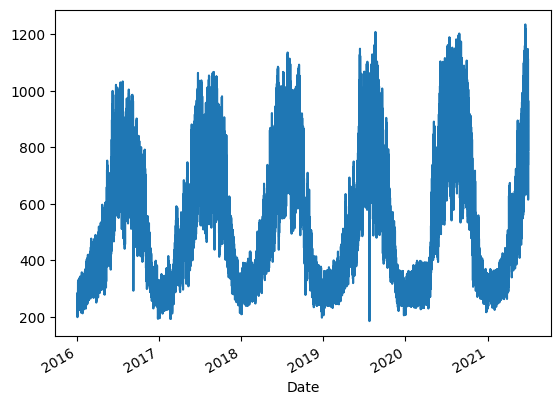

In [47]:
ax = df.Demand.plot()

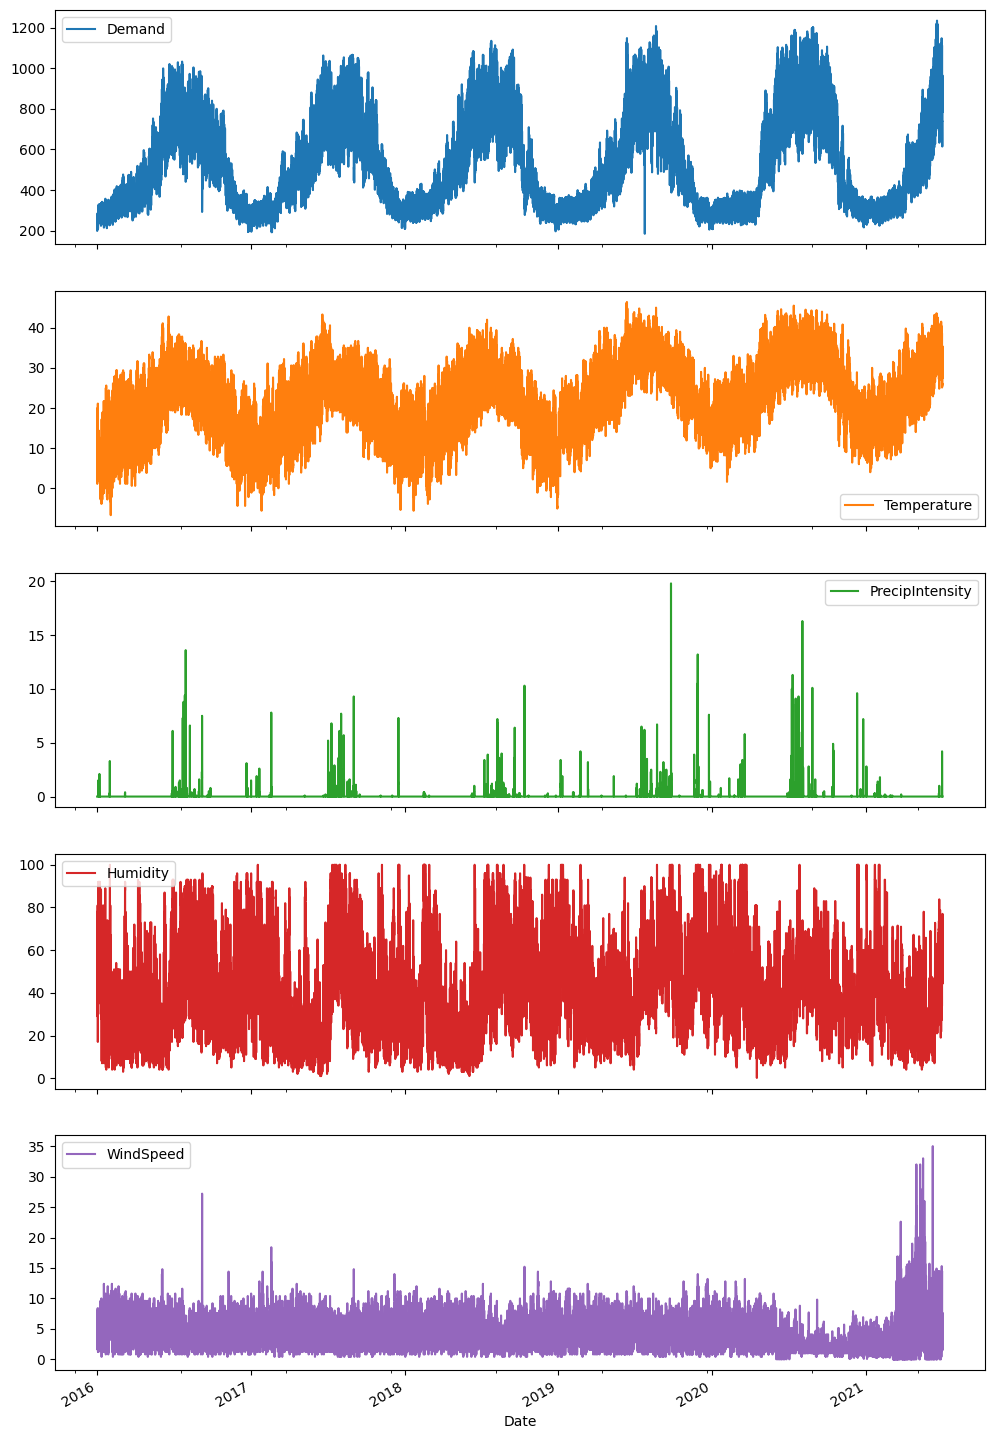

In [48]:
ax = df.plot(figsize=(12, 20), subplots=True)

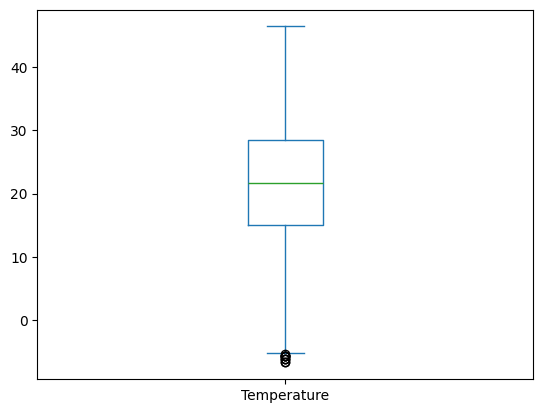

In [49]:
ax = df.Temperature.plot.box()

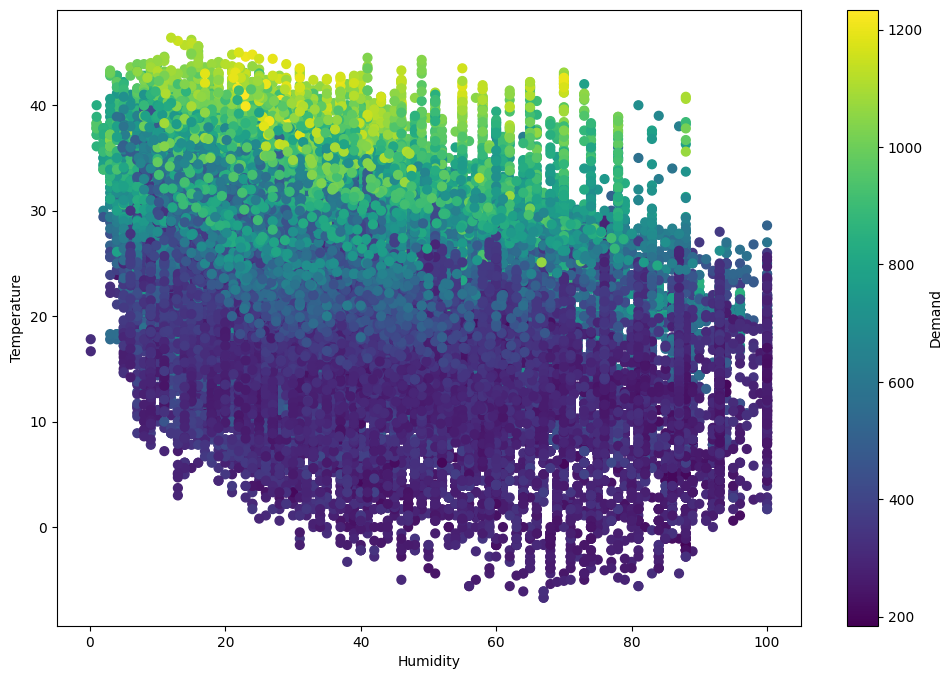

In [50]:
ax = df.plot.scatter(
    x='Humidity',
    y='Temperature',
    c='Demand',
    s =40,
    figsize=(12,8)
)

## Generando nuevas variables a partir de las variables conocidas

Generar nuevas variables es relativamente simple, pero hay algunas cosas que son diferentes con numpy y por las cuales hay que tener cuidado.

df['farenheit'] = (df.Temperature * 9/5) + 32

df['refri'] = 0
df['refri'] = df.refri.where(df.Temperature < 30, 1)

df['DiaSemana'] = df.index.weekday

df.rename(
    columns={
        'Demand': 'Demanda',
        'Temperature': 'Temperatura',
        'PrecipIntensity': 'Precipitación',
        'Humidity': 'Humedad',
        'WinSpeed': 'VelocidadViento',
    },
    inplace=True
)
df

## Analizando con regrupamientos

En particular, es interesante poder hacer algun análisis exploratorio utilizando las facilidades que da el uso del manejo de la información temporal que ofrece pandas. En espacial cuando se combina con `groupby` y diferentes funciones de agregación.

Vamos a empezar por ver la demanda promedio por día de la semana:

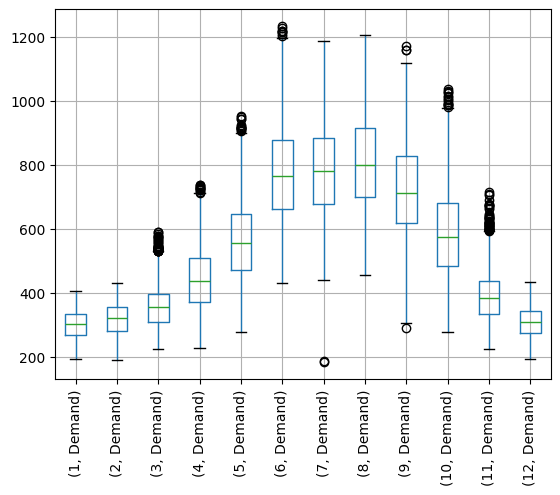

In [54]:
ax = df.groupby(df.index.month)[['Demand']].boxplot(subplots=False, rot=90)

<Axes: title={'center': 'Demand'}, xlabel='Month'>

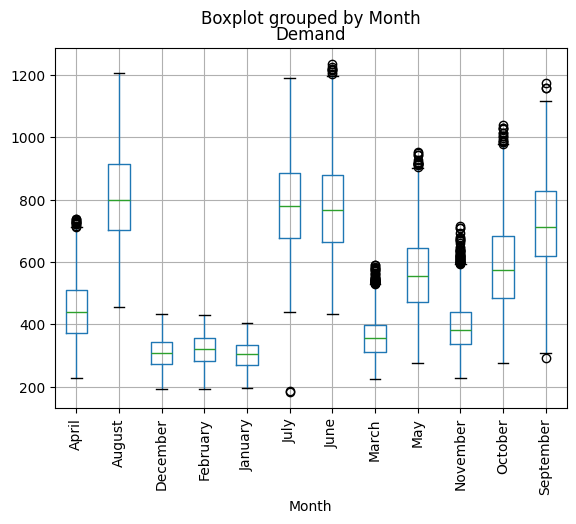

In [58]:
df.assign(Month=df.index.month_name())\
  .boxplot(column="Demand", by="Month", rot=90)


In [64]:

df_semana = df.groupby('DiaSemana').agg(
    {
        'Demanda': ['min', 'max', 'mean', 'median', 'std'],
        'Precipitación': ['min', 'max']
    }
)
df_semana

KeyError: "Column(s) ['Demanda', 'Precipitación'] do not exist"

Ahora vamos a ver que pasa en forma mensual

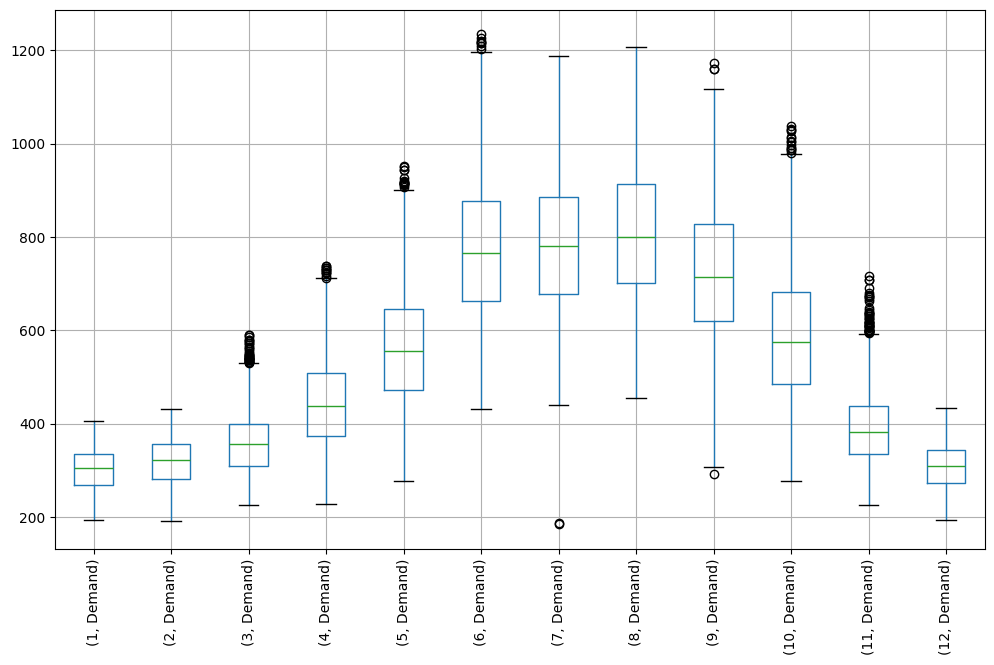

In [66]:
ax = (
    df[['Demand']]
    .groupby(df.index.month)
    .boxplot(subplots=False, rot=90, figsize=(12, 7))
)

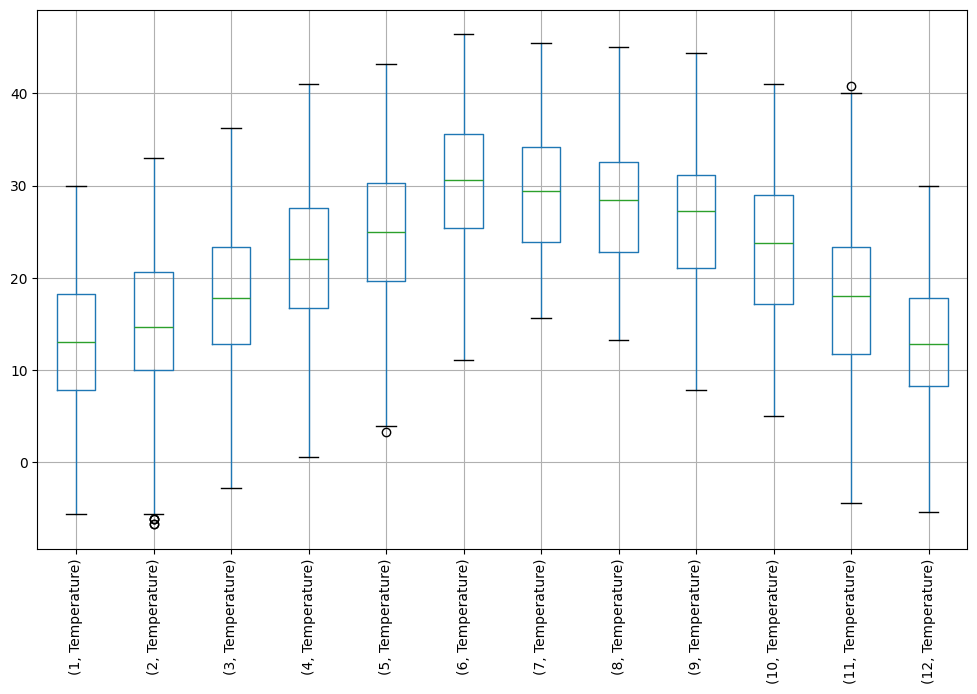

In [69]:
ax = (
    df[['Temperature']]
    .groupby(df.index.month)
    .boxplot(
        subplots=False,
        rot=90,
        figsize=(12, 7)
    )
)

O inclusive por hora del día

In [70]:
ax = (
    df[['Demand']]
    .groupby(df.index.hour)
    .boxplot(subplots=False, rot=90, figsize=(12, 7)
)

SyntaxError: incomplete input (ipython-input-1784257950.py, line 5)

In [72]:
df_hora = (
    df[['Demand', 'Temperature']]
    .groupby([df.index.hour, df.index.month_name()])
    .mean()
    .unstack()
)
df_hora

Demand                                                              \
Date       April      August    December    February     January        July   
Date                                                                           
0     448.732089  833.277277  295.464129  298.630971  284.280784  808.319781   
1     431.580211  809.785548  279.089206  282.629900  269.599281  791.148806   
2     413.064709  771.484787  268.734645  271.886818  260.116551  760.156523   
3     391.835067  739.520942  261.806897  265.007076  253.609865  727.604168   
4     376.645039  710.849387  258.211826  261.962094  250.718438  697.936329   
5     365.252906  687.343903  259.239090  263.047124  251.809643  673.425335   
6     358.743656  668.044690  266.541497  271.993876  260.464741  653.276671   
7     356.412817  650.430865  282.641277  291.551088  279.498854  629.756961   
8     360.974783  637.365477  292.883155  304.401406  289.773303  619.064116   
9     388.120578  669.204213  307.032129  321.333153  301.902914  647.582697   
10    416.243878  717.168213  318.613910  334.224571  312.729903  689.327529   
11    439.973256  762.338703  326.061045  343.230988  320.346432  731.152806   
12    460.235989  804.072910  331.584032  350.450659  326.229973  771.224884   
13    478.244161  846.788697  332.258445  352.129276  326.727157  812.266858   
14    490.952289  888.404445  334.143290  354.031618  328.008432  855.109929   
15    505.243528  932.993103  335.376768  355.518200  328.783103  900.403148   
16    519.221172  968.819729  333.952929  353.899859  327.059686  937.041503   
17    526.086367  980.125587  332.584316  350.151412  324.616184  950.619568   
18    524.327906  972.599606  337.383310  344.263341  322.082605  946.541284   
19    509.383472  943.254019  346.682452  351.407765  335.131384  919.459316   
20    489.701211  896.165594  341.657065  354.030306  334.466276  875.924987   
21    485.247017  863.709432  333.055381  346.271824  327.404708  833.030058   
22    474.967744  858.047503  320.952568  332.505865  315.338665  825.596542   
23    464.941744  848.705323  308.494329  316.195724  301.271222  820.023755   

                                                      ... Temperature  \
Date        June       March         May    November  ...    December   
Date                                                  ...               
0     808.371839  337.861312  592.498430  372.460507  ...   10.715484   
1     788.809772  319.658581  574.092575  351.458833  ...    9.939355   
2     749.662456  306.967430  542.380753  337.864660  ...    9.282581   
3     713.314622  297.823290  513.308108  327.610213  ...    8.763226   
4     680.180394  292.704909  487.413097  320.982740  ...    8.174839   
5     650.739194  292.057586  464.959360  319.463653  ...    7.839355   
6     624.723461  299.263199  447.087129  325.802367  ...    7.576129   
7     591.985606  311.544629  428.083806  340.430853  ...    7.334194   
8     583.019406  331.335570  426.218505  355.847887  ...    6.995484   
9     615.364806  354.401866  455.087091  379.212020  ...    7.713548   
10    661.665267  371.575425  491.660995  398.790087  ...   10.389032   
11    705.932439  384.594366  524.367591  414.917253  ...   13.384516   
12    748.501278  396.318339  553.652317  429.649313  ...   16.061290   
13    793.743728  401.298065  583.019484  438.409700  ...   17.934194   
14    840.929728  406.176462  610.537586  447.655020  ...   19.281935   
15    893.202500  410.312269  645.063522  454.599933  ...   19.918065   
16    936.781239  410.151855  679.108882  454.438493  ...   20.046452   
17    957.641911  405.993086  699.003677  447.909700  ...   19.634839   
18    957.546617  395.102242  701.796425  438.450320  ...   18.576774   
19    930.344928  388.049495  681.632629  434.755133  ...   16.314839   
20    879.583144  394.125849  643.370188  424.569147  ...   14.519355   
21    828.059378  385.728059  616.101995  413.515953  ...   13.243226   
22    817.715172  371.49

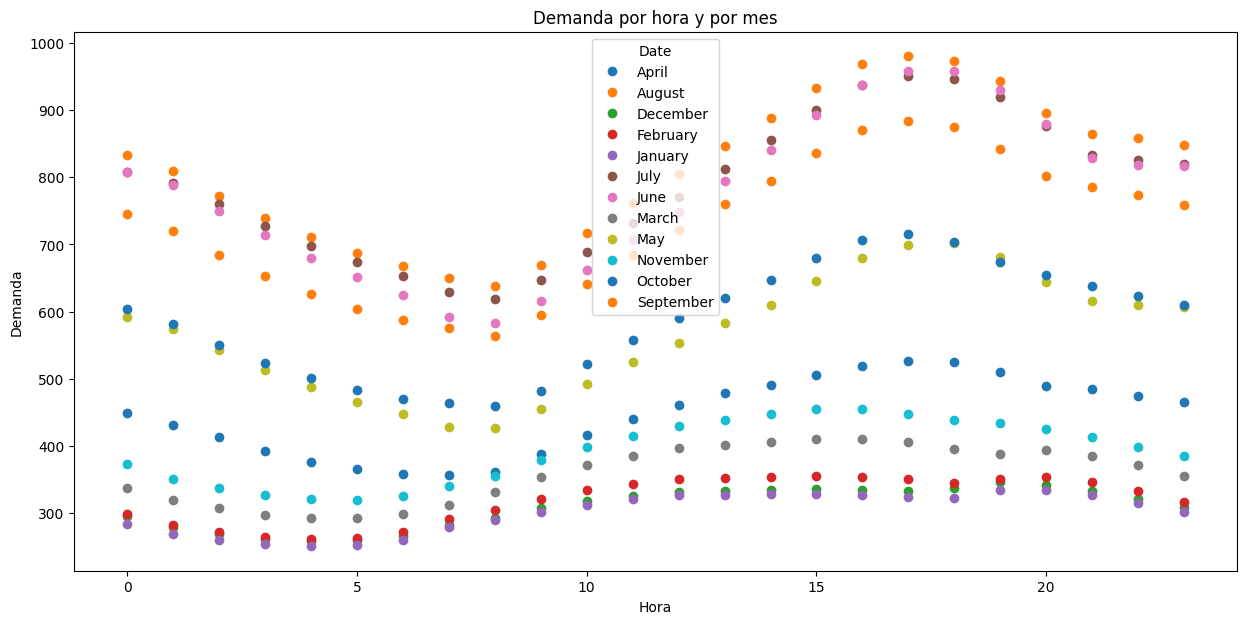

In [74]:
ax = df_hora.Demand.plot(
    style='o',
    figsize=(15,7),
    title='Demanda por hora y por mes',
    xlabel='Hora',
    ylabel='Demanda'
)

In [75]:
ax = df_hora.Temperatura.plot(
    style='o',
    figsize=(15,7))

AttributeError: 'DataFrame' object has no attribute 'Temperatura'

## Generando nuevas variables a partir de las variables conocidas

Generar nuevas variables es relativamente simple, pero hay algunas cosas que son diferentes con numpy y por las cuales hay que tener cuidado.

### Vamos a practicar

Para esta practica vamos a usar un conjunto de datos de la revista *wine magazine*,
donde revisan una cantidad bastante sorprendente de vinos.

Una descripción de la base de datos la encuentras [aquí](https://www.kaggle.com/zynicide/wine-reviews).
Para no tener que descargar los datos a mano, se anexa la dirección `url` de donde se pueden descargar.

Es importante notr que la primer columna del archivo `csv` es el índice (usar `index_col=0` cuando se descargue el archivo con `pd.read_csv`).

Una vez descargado, usar pandas para las siguientes tareas:

1. ¿Cuantas variables tiene el dataframe? ¿Qué variables tienen valores perdidos? ¿Qué variables son numéricas? ¿Qué variables son cualitativas?
2. Hacer un dataframe con únicamente vinos europeos.
3. ¿Cuál es el menor, el mayor y el precio promedio de la botella por país? ¿De que país es la botella de menor precio?
4. ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
5. ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
6. Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares.
7. ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?


In [76]:
winmag_url = 'https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv'

In [77]:
df = pd.read_csv(winmag_url, index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [83]:
# ¿Cuantas variables tiene el dataframe?
# 13
df.shape
# ¿Qué variables tienen valores perdidos?
# Country, designation, price, province, region_1, region_2, taster_name, taster_twitter_handle
df.isna().sum()
# ¿Qué variables son numéricas?
#Points y price
df.select_dtypes(include=['int64', 'float64']).columns
# ¿Qué variables son cualitativas?
# 'country', 'description', 'designation', 'province', 'region_1','region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety','winery'
df.select_dtypes(include=['object']).columns

Index(['country', 'description', 'designation', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

In [87]:
# Hacer un dataframe con únicamente vinos europeos.
df['country'].unique()
paises = ['Italy', 'Portugal', 'Spain', 'France', 'Germany', 'Austria', 'Hungary', 'Greece', 'Romania', 'Czech Republic', 'Slovenia', 'Luxembourg', 'Croatia', 'Georgia',
          'England', 'Serbia', 'Moldova', 'Bulgaria', 'Cyprus', 'Switzerland', 'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia']
df.loc[df.country.isin(paises)]


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65486,France,"Closed up and firm with a hint of vanilla, hon...",Domaine Long-Depaquit Les Bougnons Premier Cru,90,NaN,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Albert Bichot 2005 Domaine Long-Depaquit Les B...,Chardonnay,Albert Bichot
65491,France,"A big, toasty wine, full of ripe, delicious fr...",Fourchaume Vieilles Vignes Premier Cru,90,36.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Pascal Bouchard 2006 Fourchaume Vieilles Vigne...,Chardonnay,Pascal Bouchard
65492,France,"A rounded, fruity wine, packed with yellow pea...",Mont-de-Milieu Premier Cru,90,30.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2005 Mont-de-Milieu Premier Cr...,Chardonnay,Simonnet-Febvre
65494,France,Made from young vines from the Vaulorent porti...,Fourchaume Premier Cru,90,45.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,William Fèvre 2005 Fourchaume Premier Cru (Ch...,Chardonnay,William Fèvre


In [106]:
# ¿Cuál es el menor, el mayor y el precio promedio de la botella por país?
df.groupby('country')[['price']].agg(['min', 'max', 'mean'])
# ¿De que país es la botella de menor precio?
df.loc[df['price'].idxmin(), 'country']

'Spain'

In [108]:
from numpy import isin
# ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
df[df['description'].str.contains('strawberry', case=False, na=False)]


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
58,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,13.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
78,US,Some rosés are made simply by bleeding the jui...,Rosé of,86,25.0,Oregon,Eola-Amity Hills,Willamette Valley,Paul Gregutt,@paulgwine,Z'IVO 2015 Rosé of Pinot Noir (Eola-Amity Hills),Pinot Noir,Z'IVO
108,US,"Lots of spearmint, coyote mint, hot licorice, ...",J.D. Hurley,87,26.0,California,Santa Clara Valley,Central Coast,Matt Kettmann,@mattkettmann,Martin Ranch 2014 J.D. Hurley Zinfandel (Santa...,Zinfandel,Martin Ranch
117,US,"Baked red cherry, crushed clove, iron and rose...",Estate,87,44.0,California,Central Coast,NaN,Matt Kettmann,@mattkettmann,Rideau 2014 Estate Syrah,Syrah,Rideau
146,US,"There's a touch of hot asphalt, pencil lead an...",Family Reserve,91,68.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Vincent Vineyards 2010 Family Reserve Cabernet...,Cabernet Sauvignon,Vincent Vineyards
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65303,Italy,This opens with varietal aromas of strawberry ...,Hexenbichler,88,15.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tramin 2013 Hexenbichler Schiava (Alto Adige),Schiava,Tramin
65372,US,The apricot and peach-yogurt scents come acros...,NaN,84,14.0,Virginia,Virginia,NaN,NaN,NaN,Boxwood 2011 Rosé (Virginia),Rosé,Boxwood
65409,Spain,"A bit hard and sharp on the nose, but on the p...",Flos de Pinoso Made With Organic Grapes,85,13.0,Levante,Alicante,NaN,Michael Schachner,@wineschach,La Bodega de Pinoso 2008 Flos de Pinoso Made W...,Monastrell,La Bodega de Pinoso
65413,Israel,This wine is dominated by sweet oak aromas of ...,Kosher,85,18.0,Galilee,NaN,NaN,Lauren Buzzeo,@laurbuzz,Galil Mountain 2007 Kosher Pinot Noir (Galilee),Pinot Noir,Galil Mountain


In [112]:
# ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
df['designation'].nunique()
df['designation'].value_counts().idxmax()
df['designation'].value_counts().max()


999

In [113]:
# Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares
df.loc[df.price < 20, ['variety', 'country', 'price']]

,variety,country,price
1,Portuguese Red,Portugal,15.0
2,Pinot Gris,US,14.0
3,Riesling,US,13.0
5,Tempranillo-Merlot,Spain,15.0
6,Frappato,Italy,16.0
...,...,...,...
65456,Cabernet Sauvignon,US,11.0
65472,Chardonnay,US,19.0
65481,Malbec,Argentina,11.0
65482,Cabernet Sauvignon,Australia,17.0


In [114]:
# ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?
df[df['variety'] == 'Pinot Noir'].groupby('country').size()


,0
country,
Argentina,46
Australia,58
Austria,51
Brazil,2
Bulgaria,9
Canada,8
Chile,184
Croatia,1
England,5
